In [23]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [24]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [25]:
NUM_CLASSES = 6

# Dataset reading

In [26]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [27]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [29]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [30]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_2 (Dropout)         (None, 42)                0         
                                                                 
 dense_3 (Dense)             (None, 20)                860       
                                                                 
 dropout_3 (Dropout)         (None, 20)                0         
                                                                 
 dense_4 (Dense)             (None, 10)                210       
                                                                 
 dense_5 (Dense)             (None, 6)                 66        
                                                                 
Total params: 1136 (4.44 KB)
Trainable params: 1136 (4.44 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [31]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [32]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [40]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000


 1/30 [>.............................] - ETA: 3s - loss: 0.6096 - accuracy: 0.7734
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
30/30 [==============================] - 0s 3ms/step - loss: 0.5824 - accuracy: 0.7919 - val_loss: 0.2942 - val_accuracy: 0.9268
Epoch 2/1000
 1/30 [>.............................] - ETA: 0s - loss: 0.5247 - accuracy: 0.8047
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
30/30 [==============================] - 0s 1ms/step - loss: 0.5862 - accuracy: 0.7877 - val_loss: 0.2930 - val_accuracy: 0.9276
Epoch 3/1000
 1/30 [>.............................] - ETA: 0s - loss: 0.5016 - accuracy: 0.8359
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
30/30 [==============================] - 0s 996us/step - loss: 0.5693 - accuracy: 0.7954 - val_loss: 0.2852 - val_accuracy: 0.9292
Epoch 4/1000
 1/30 [>.............................] - ETA: 0s - loss: 0.5126 - accuracy: 0.7891
Epoch 4: sav

/opt/anaconda3/envs/gestureMedia/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 8: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
30/30 [==============================] - 0s 998us/step - loss: 0.5886 - accuracy: 0.7933 - val_loss: 0.2899 - val_accuracy: 0.9300
Epoch 9/1000
 1/30 [>.............................] - ETA: 0s - loss: 0.4537 - accuracy: 0.8438
Epoch 9: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
30/30 [==============================] - 0s 1ms/step - loss: 0.5805 - accuracy: 0.7930 - val_loss: 0.2911 - val_accuracy: 0.9252
Epoch 10/1000
 1/30 [>.............................] - ETA: 0s - loss: 0.5107 - accuracy: 0.8203
Epoch 10: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
30/30 [==============================] - 0s 991us/step - loss: 0.5736 - accuracy: 0.7962 - val_loss: 0.2896 - val_accuracy: 0.9268
Epoch 11/1000
 1/30 [>.............................] - ETA: 0s - loss: 0.6587 - accuracy: 0.7422
Epoch 11: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
30/30 [=====

In [41]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

10/10 [==============================] - 0s 501us/step - loss: 0.2817 - accuracy: 0.9332


In [42]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [43]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 29ms/step
[9.7777551e-01 1.8352918e-02 1.4730045e-04 2.6079008e-04 2.5017157e-06
 3.4609637e-03]
0


# Confusion matrix

40/40 [==============================] - 0s 319us/step


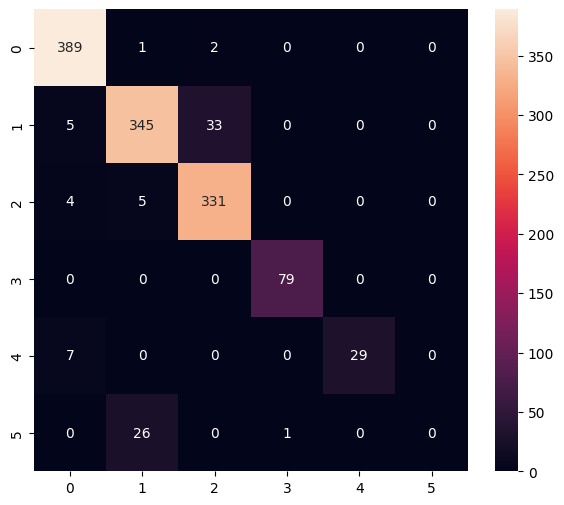

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       392
           1       0.92      0.90      0.91       383
           2       0.90      0.97      0.94       340
           3       0.99      1.00      0.99        79
           4       1.00      0.81      0.89        36
           5       0.00      0.00      0.00        27

    accuracy                           0.93      1257
   macro avg       0.79      0.78      0.78      1257
weighted avg       0.91      0.93      0.92      1257



/opt/anaconda3/envs/gestureMedia/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/gestureMedia/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/gestureMedia/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [45]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

/opt/anaconda3/envs/gestureMedia/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [46]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: /var/folders/bl/wwtw75nn47120mwmkrc271m00000gn/T/tmp9h1rmbbw/assets


INFO:tensorflow:Assets written to: /var/folders/bl/wwtw75nn47120mwmkrc271m00000gn/T/tmp9h1rmbbw/assets
2024-08-30 15:13:02.436565: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:364] Ignored output_format.
2024-08-30 15:13:02.436576: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:367] Ignored drop_control_dependency.


6660

# Inference test

In [47]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [48]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [49]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [50]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 30 µs, sys: 6 µs, total: 36 µs
Wall time: 37.7 µs


In [51]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[9.7777551e-01 1.8352937e-02 1.4730060e-04 2.6078985e-04 2.5017207e-06
 3.4609670e-03]
0
